This is a project testing regressions using PyTorch, where I also test how to utilize the GPU, save, and load the model.

Gradient descent and backpropagation are necessary to create the model.

Yi = f(Xi, Beta) + bias



In [ ]:
import torch
from torch import nn 
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

torch.__version__

'2.2.1+cu121'

Keep tensors capitalized, good practice.

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
#Keep tensors capitalized, good practice.
X = torch.arange(start, end, step)
X

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

I need to add an extra dimension to keep it organized. We don't want tensor size errors.

In [ ]:
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X
#or X[:10] to see the first 10 items

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [ ]:
len(X)

50

In [ ]:
len(y)

50

Splitting the data:

Train: 60% to 80%

Validation: 10% to 20%

Testing: 10% to 20%

You can do the same with scikit


In this case, I want to use the indices of tensor X, 40 items

In [ ]:

train_split = int(0.8 * len(X))
train_split

40

This is a representation of the first 40 items.


In [ ]:
X[:train_split]


tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])

Now, for the remaining 10 items.

In [ ]:

X[train_split:]

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test) , len(y_test)

(40, 40, 10, 10)


#Can we improve the visualization?

In [ ]:
def plot_pred(train_data=X_train,
              train_labels = y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions = None):
  """
  plotar data, test data e comparar predictions
  """
  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels, c="b", s=4, label = "Training Dataaa")

  plt.scatter(test_data, test_labels, c="g", s=4, label= "testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label = "predictions")

  plt.legend(prop={"size":14});



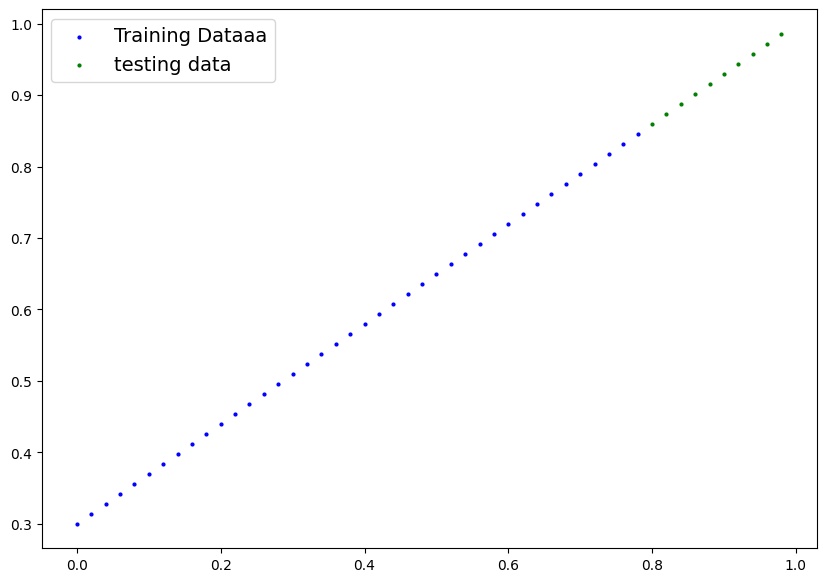

In [ ]:
plot_pred();

We can use PyTorch classes (OOP) for this.

#It's important to see what I inherit from this nn.Module class.

# https://pytorch.org/docs/stable/generated/torch.nn.Module.html

My model needs to subclass this class (nn.Module is the subclass, it has the buildings).


Inside, I have my class constructors. I create them.

This step below is necessary because I am working with my own dataset. If I were using a dataset from Kaggle, for example, other modules would be imported, and I would not need to declare weights and biase

In [ ]:


from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self): #construtor
    super().__init__()

    #constructors
    #https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html
    self.weights = nn.Parameter(torch.randn(1, # peso inicial
                                            requires_grad = True, # I ask to update via gradient descent
                                            dtype=torch.float)) #pytorch likes float 32
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad = True,
                                        dtype=torch.float))

    #I create my weight parameters, bias parameters.
    #I create the forward pass. ALL NN.MODULES REQUIRE A FORWARD PASS
    #Note: x is my input data.

    """
    
    Here we also have a good programming practice occurring.
    Where x: torch.Tensor informs me that I expect my x to receive something of type torch.Tensor.
    While the syntax () -> tells me that this function will return an output of type torch.Tensor.
    These are good practices.
    """

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias



Main classes of the NN to interact with.

torch.nn - my buildings
torch.nn.Parameter - the parameters we want to learn, these PyTorch provides to us

torch.nn.Module - if I use it as a subclass, I need to perform the forward pass

torch.optim - I need to create an optimizer. Algorithms can be updated by an optimizer

torch.utils.data.Dataset - maps labels and features into data pairs (VERY USEFUL)

torch.utils.data.Dataloader - creates an iterable from my dataset

torchvision.transforms

torchvision.models - fetch pre-trained models

torch.utils.tensorboard - experiments.
#https://pytorch.org/tutorials/beginner/ptcheat.html

In [ ]:
#look inside the model:

torch.manual_seed(42)
#actually, the correct way would be to use torch.randn(1) because that's how it works in reality
#creating an instance of the model to initialize it

model_0 = LinearRegressionModel()
model_0 #it will just inform me what it received

LinearRegressionModel()

In [ ]:
model_0.parameters()
#informs the type i received

<generator object Module.parameters at 0x7dc4f81967a0>

In [ ]:
list(model_0.parameters())
#ok, so I receive the parameters, an initial float weight, and the requires

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [ ]:
#I can make it even easier to visualize

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
y_preds = model_0(X_test)
y_preds
#Here I have the grad.

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]], grad_fn=<AddBackward0>)

In [ ]:
#Evaluating my model with the predictions. torch.inference_mode()
#With this inference mode, I remove the gradient from the passed subclass. There is no training, so it doesn't make sense to track the data. The inference will be faster
#Using torch.no_grad() has already been discussed

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds



#torch.no_grad() is basically the same thing as inference mode


tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

'''
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds
'''

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

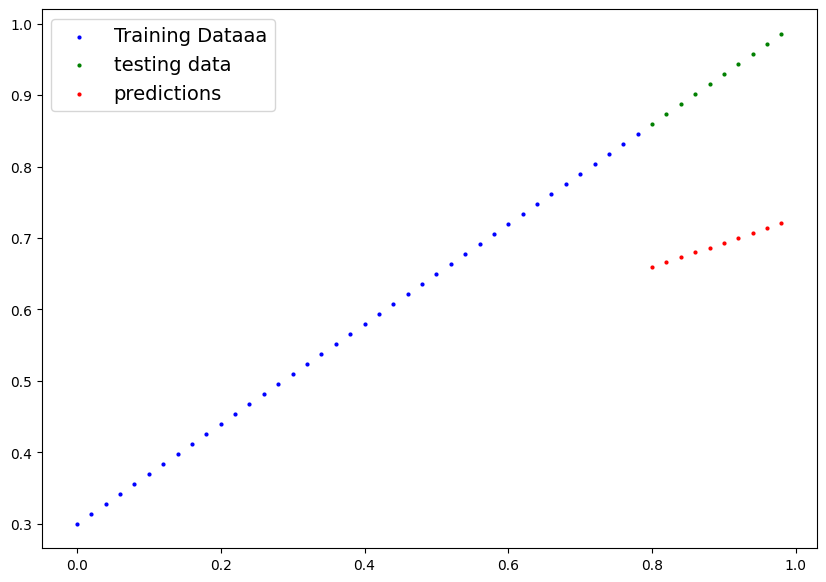

In [ ]:
plot_pred(predictions=y_preds)

To train, I need to measure. Use a loss function or criterion. PYTORCH HAS SEVERAL !!
(https://pytorch.org/docs/stable/nn.html#loss-functions)

Optimizer -> adjust the weights and biases.

In PyTorch, L1 is the MAE - min absolute error -> it is the absolute value of the distance, while cross-entropy is used for classification.

Loss function and optimizer work together !!

(https://pytorch.org/docs/stable/optim.html)

For optimizer, there's Adam, SGD, and many more !!
Stochastic gradient descent -> is done using random values.

To use the SGD optimizer, I need to pass the model as a parameter, along with the learning rate.



In [ ]:
loss_fn = nn.L1Loss()
loss_fn

optimizer = torch.optim.SGD(params=model_0.parameters(),
                                              lr=0.001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
#isso é inutil
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

training loop:

loop the data.

forward pass.

calculate the loss

optmizer zero grad

loss backward

optimizer step -> gradient descendent


In [ ]:

# HERE THE TRAIN AND TEST LOOPS ARE TOGETHER, WHICH IS AN ERROR
epochs = 2000 #loops on data


#track the experiment

epoch_count = []
loss_values = []
test_loss_values = []

#train
for epoch in range(epochs):
  model_0.train()

  #foward pass
  y_pred = model_0(X_train)

  #loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss:{loss}")
  #optimizer zero grad. Basically, I need to zero my error, otherwise it will keep accumulating.
  optimizer.zero_grad()

  #backpropagation, loss backward
  loss.backward()

  #optimizer step
  optimizer.step()


  #TESTING !!!
  model_0.eval() #Remove unnecessary things to evaluate the model, such as dropout layers for example. It doesn't perform batch normalization.
  with torch.inference_mode():
    #forward pass
    test_pred = model_0(X_test)

    #calculate los on the test dataset

    test_loss = loss_fn(test_pred, y_test)

  #print whats happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())



Loss:0.08169572055339813
Epoch: 0 | Loss: 0.08169572055339813 | Test loss: 0.23226967453956604
OrderedDict([('weights', tensor([0.3370])), ('bias', tensor([0.3908]))])
Loss:0.0814758837223053
Loss:0.08125604689121246
Loss:0.08103619515895844
Loss:0.0808163583278656
Loss:0.08059649914503098
Loss:0.08037666976451874
Loss:0.08015681803226471
Loss:0.07993697375059128
Loss:0.07971713691949844
Loss:0.07951223850250244
Epoch: 10 | Loss: 0.07951223850250244 | Test loss: 0.22605447471141815
OrderedDict([('weights', tensor([0.3401])), ('bias', tensor([0.3942]))])
Loss:0.07933284342288971
Loss:0.07915343344211578
Loss:0.07897403836250305
Loss:0.07879464328289032
Loss:0.07861524075269699
Loss:0.07843583822250366
Loss:0.07825644314289093
Loss:0.078077033162117
Loss:0.07789763063192368
Loss:0.07771823555231094
Epoch: 20 | Loss: 0.07771823555231094 | Test loss: 0.22039338946342468
OrderedDict([('weights', tensor([0.3431])), ('bias', tensor([0.3972]))])
Loss:0.07753884047269821
Loss:0.0773594379425048

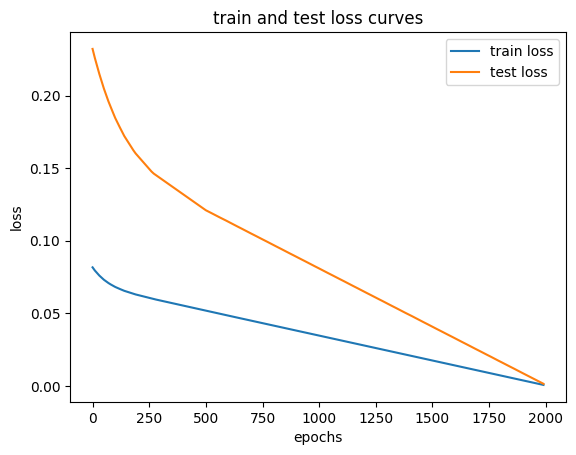

In [ ]:
#Since I'm dealing with tensors, I wouldn't be able to plot. I need to convert them to numpy.
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label = "train loss")
plt.plot(epoch_count, test_loss_values, label = "test loss")
plt.title("train and test loss curves")

plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()


In [ ]:
#With the inference mode, I discard gradient tracking, along with many other unnecessary tools.
with torch.inference_mode():
  y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.8594],
        [0.8734],
        [0.8874],
        [0.9014],
        [0.9153],
        [0.9293],
        [0.9433],
        [0.9572],
        [0.9712],
        [0.9852]])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6986])), ('bias', tensor([0.3006]))])

In [ ]:
weight, bias

(0.7, 0.3)

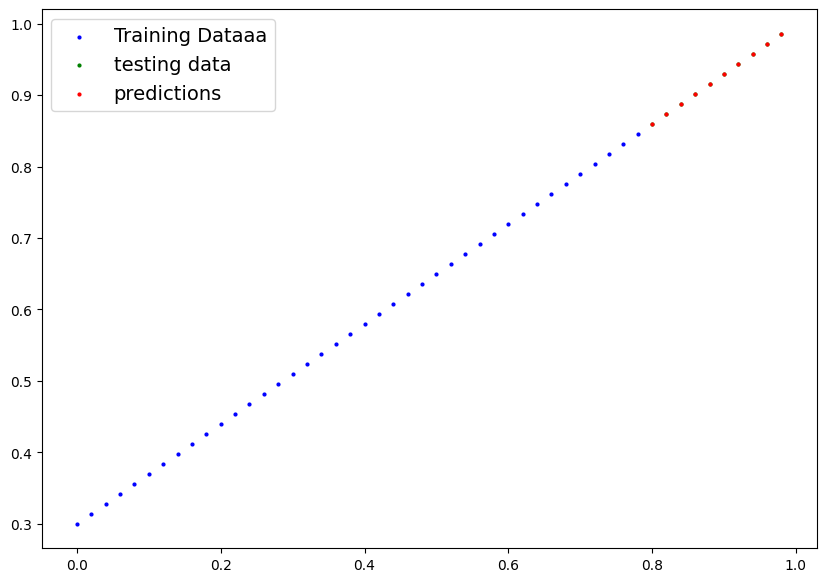

In [ ]:
plot_pred(predictions=y_preds_new);

there are differences with inference !! ??


#saving a model in PyTorch:
#there are 3 ways to save and load. serialize and deserialize

torch.save()

torch.load()
#saves as a dictionary
torch.nn.Module.load_state_dict()
save as state dict

#https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_models_for_inference.html#:~:text=save()%20function%20will%20give,module%20using%20Python's%20pickle%20module.






In [ ]:
from pathlib import Path

#To create a directory:

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#To create a model save path

MODEL_NAME = "01_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model state dict

print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)



saving model to: models/01_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1514 Apr 28 19:17 01_model_0.pth


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6986])), ('bias', tensor([0.3006]))])

In [ ]:

To load the model -> check the documentation
loaded_model_0 = LinearRegressionModel()

#load the save state dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))



<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6986])), ('bias', tensor([0.3006]))])

In [ ]:
# Predictions with the new model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8594],
        [0.8734],
        [0.8874],
        [0.9014],
        [0.9153],
        [0.9293],
        [0.9433],
        [0.9572],
        [0.9712],
        [0.9852]])

In [ ]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8594],
        [0.8734],
        [0.8874],
        [0.9014],
        [0.9153],
        [0.9293],
        [0.9433],
        [0.9572],
        [0.9712],
        [0.9852]])

The example ends here.
Now I'm using another approach, using layers.

#https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

y = x*A^t + b
#which is a structure of linear regression



In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")

using device: cuda


In [ ]:

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super(). __init__()
    #This has several names. Linear layer, dense layer, fully connected layer...
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
   return self.linear_layer(x)

torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()
#The linear layer performs a linear transformation on the data.
#Now that I don't need to declare my weights and biases, and I'm using the linear layer from Torch, I also don't need to create a forward propagation.
#I create the forward propagation, but I just need to pass my tensor, which is a linear layer. Before, I would have to pass the entire regression function.

#In this layers game, there are several that can be passed, such as pooling, padding, convolution, transformer layers, and so on. Check in the torch.nn documentation.

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
# It happens that the first time, we initialize the parameters, but often, instead of parameters, we initialize layers.
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
#train == loss, optimizer, train loop, test loop
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [ ]:
torch.manual_seed(42)
epochs = 200
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_pred= model_1(X_train)

  loss=loss_fn(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  #test

  model_1.eval()
  with torch.inference_mode():
    test_pred= model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 ==0:
    print(f"epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

#You can't have 2 devices. My data needs to be on the CPU or all need to be on the CPU.

epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
#predictions.

model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

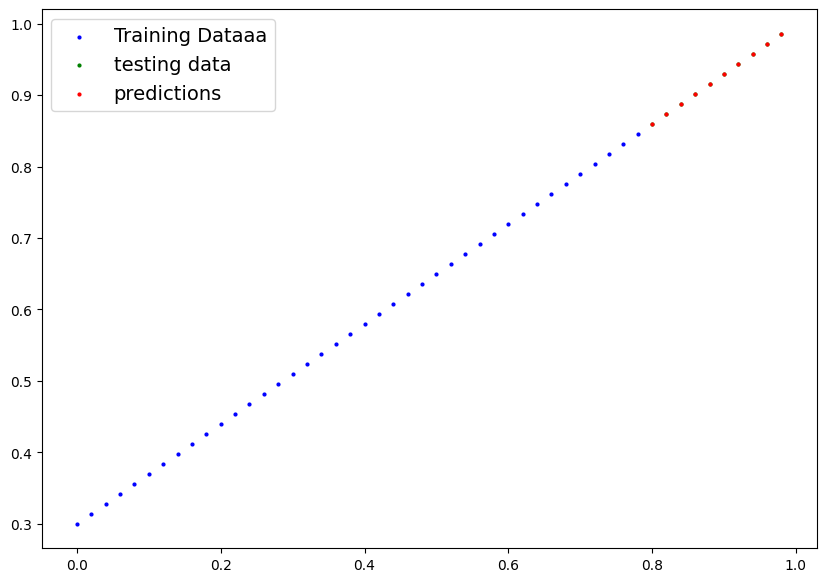

In [ ]:
#I need to transform back to the CPU.
plot_pred(predictions=y_preds.cpu())

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_mdeo_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/01_mdeo_1.pth


In [ ]:
#load

loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')